<a href="https://colab.research.google.com/github/MatheusFariaMf/RedeNeuralDoZero/blob/main/Rede_neural_do_zero.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import numpy as np
import torch
import torch.nn.functional as F
import torchvision
import matplotlib.pyplot as plt
from time import time
from torchvision import datasets, transforms
from torch import nn, optim

In [26]:
transform = transforms.ToTensor() # definindo a conversão de imagem para tensor

#trainset = datasets.MNIST('./MNIST_data/', download=True, train=True, transform=transform) #Carrega a parte de treino do dataset
trainset = datasets.MNIST('./', download=True,
transform=transforms.Compose([
transforms.ToTensor(),
]), train=True)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True) # Cria um buffer para pegar os dados por partes

valset = datasets.MNIST('./MNIST_data/', download=True, train=True, transform=transform) #Carrega a parte de validação do dataset
valloader = torch.utils.data.DataLoader(valset, batch_size=64, shuffle=True) # Cria um buffer para pegar os dados por parte

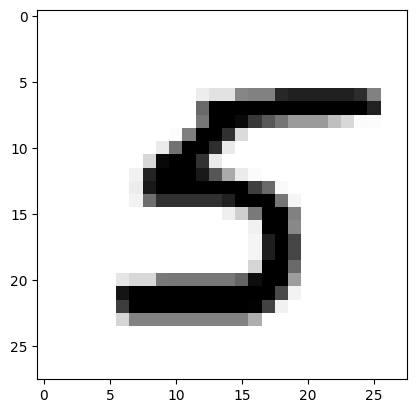

In [27]:
dataiter = iter(trainloader)
imagens, etiquetas = next(dataiter)
plt.imshow(imagens[0].numpy().squeeze(), cmap='gray_r');

In [28]:
print(imagens[0].shape) # para verificar as dimensões do tensor de cada imagem
print(etiquetas[0].shape) # para verificar as dimensões do tensor de cada etiqueta

torch.Size([1, 28, 28])
torch.Size([])


In [29]:
class Modelo(torch.nn.Module):
  # Define the layers of the model here
  def __init__(self):
    super(Modelo, self).__init__()
    self.linear1 = torch.nn.Linear(784, 128, bias=True)
    self.linear2 = torch.nn.Linear(128, 64, bias=True)
    self.linear3 = torch.nn.Linear(64, 10, bias=True)

  # Define the forward pass of the model here
  def forward(self, x):
    x = self.linear1(x)
    x = torch.nn.functional.relu(x)  # Add a ReLU activation after each linear layer
    x = self.linear2(x)
    x = torch.nn.functional.relu(x)
    x = self.linear3(x)
    return x

In [30]:
def treino(modelo, trainloader, device):

  otimizador = optim.SGD(modelo.parameters(), lr=0.01, momentum=0.5) # Define a política de atualização dos pesos e da bias
  inicio = time() # Timer para sabermos quanto tempo levou o treino

  criterio = nn.NLLLoss() #Definindo o critério para calcular a perda
  EPOCHS = 10 # Número de epochs que o algoritmo rodará
  modelo.train() # Ativando o modo de treinamento do modelo

  for epoch in range(EPOCHS):
    perda_acumulada = 0; # Inicialização da perda acumulada da epoch em questão

    for imagens, etiquetas in trainloader:

      imagens = imagens.view(imagens.shape[0], -1) # Convertendo as imagens para "vetores" de 28*28 casas para ficarem compatíveis com a
      otimizador.zero_grad() # Zerando os gradientes por conta do ciclo anterior

      output = modelo(imagens.to(device)) # Colocando os dados no modelo
      perda_instantanea = criterio(output, etiquetas.to(device)) # Calculando a perda da epoch em questão

      perda_instantanea.backward() # Back propagation a partir da perda

      otimizador.step() # Atualizando os pesos e a bias

      perda_acumulada += perda_instantanea.item() # Atualização da perda acumulada

    else:
      print("Epoch {} - Perda resultante: {}".format(epoch+1, perda_acumulada/len(trainloader)))
  print("\nTempo de treino (em minutos) = ", (time()-inicio)/60)

In [31]:
modelo = Modelo()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
modelo.to(device)

# Iniciando o treino
treino(modelo, trainloader, device)

Epoch 1 - Perda resultante: nan
Epoch 2 - Perda resultante: nan
Epoch 3 - Perda resultante: nan
Epoch 4 - Perda resultante: nan
Epoch 5 - Perda resultante: nan
Epoch 6 - Perda resultante: nan
Epoch 7 - Perda resultante: nan
Epoch 8 - Perda resultante: nan
Epoch 9 - Perda resultante: nan
Epoch 10 - Perda resultante: nan

Tempo de treino (em minutos) =  1.4297049641609192
